# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [2]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

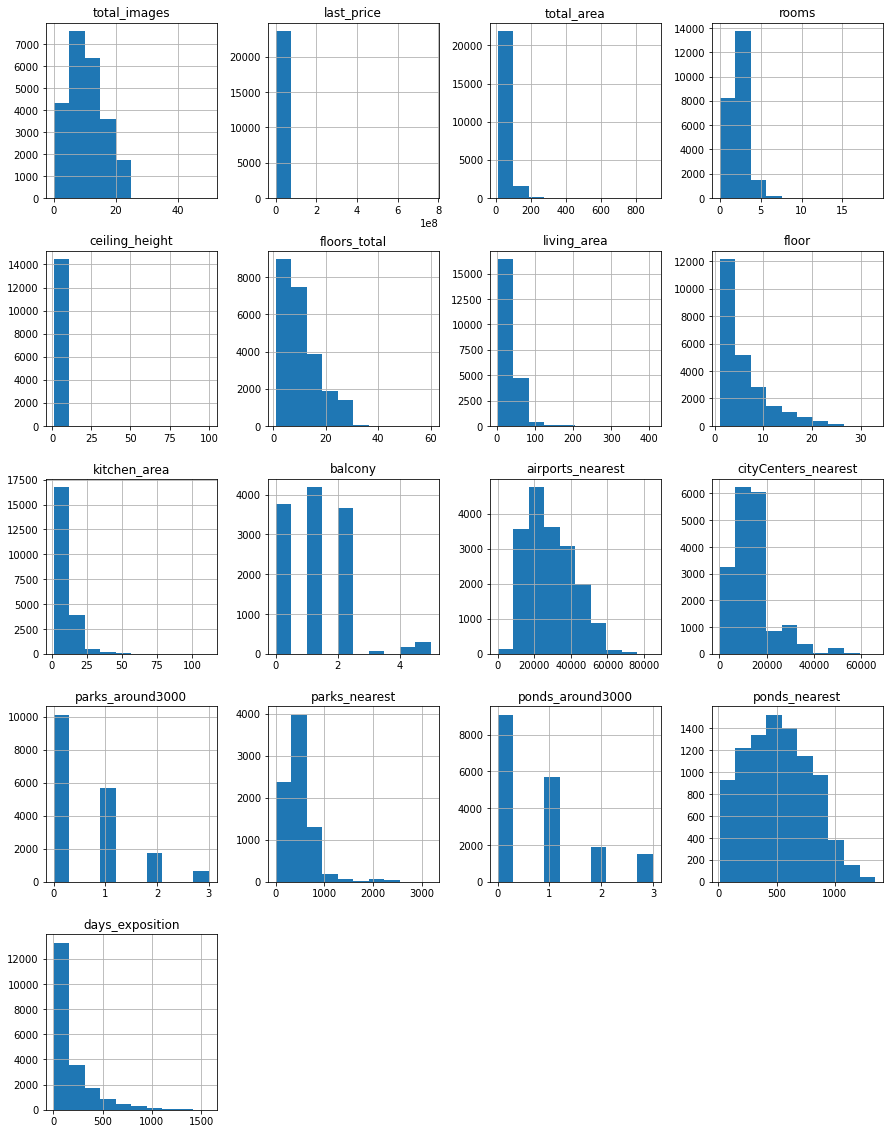

In [3]:
data.hist(figsize=(15, 20))

In [4]:
data.duplicated().sum()

0

### Предобработка данных

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
data['balcony'] = data['balcony'].fillna(0) # заполнение этого пропуска связано с тем, что скорее всего люди в чьих квартирах нет балконов не стали заполнять эту строку
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) # заполнение этого столбца медианой из-за того, что большинство значений не имеют большого разброса

Большая часть пропусков была оставлена в связи невозможностью их заполнения из-за незнания точных данных. Если говорить о причинах возникновения пропусков, то в основном пропуски в данных появляются из-за человеческой ошибки, сбоя системы или клиент забыл указать о себе какие-нибудь сведения.

In [7]:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Изменить тип данных необходимо для его корректного вида. Большую часть данных типа float64 было решено оставить из-за того, что по словам преподавателя с типом данных int64 могут неправильно строяться графики, и главным их отличием является объем занимаемого пространства.

In [8]:
duplicates = ['городской поселок','городской посёлок', 'поселок городского типа','посёлок городского типа','посёлок']
name = 'поселок'
data['locality_name'] = data['locality_name'].replace(duplicates,name, regex = True)
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Фёдоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зелено

In [9]:
data = data[(data['ceiling_height'] >= 2) & (data['ceiling_height'] <= 6)]
data['ceiling_height'].unique()

array([2.7 , 2.65, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 ,
       2.55, 3.  , 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57, 4.15,
       3.5 , 3.3 , 2.71, 4.  , 2.47, 2.73, 2.84, 3.1 , 2.34, 3.4 , 3.06,
       2.72, 2.54, 2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 5.2 , 2.87, 2.66,
       2.59, 2.  , 2.45, 3.6 , 2.92, 3.11, 3.13, 3.8 , 3.15, 3.55, 3.16,
       3.62, 3.12, 2.53, 2.74, 2.96, 2.46, 5.3 , 5.  , 2.79, 2.95, 4.06,
       2.94, 3.82, 3.54, 3.53, 2.83, 4.7 , 2.4 , 3.38, 3.01, 5.6 , 3.65,
       3.9 , 3.18, 3.35, 2.3 , 3.57, 2.48, 2.62, 2.82, 3.98, 2.63, 3.83,
       3.52, 3.95, 3.75, 2.88, 3.67, 3.87, 3.66, 3.85, 3.86, 4.19, 3.24,
       4.8 , 4.5 , 4.2 , 3.36, 3.08, 3.68, 3.07, 3.37, 3.09, 3.26, 3.34,
       2.81, 3.44, 2.97, 3.14, 4.37, 2.68, 3.22, 3.27, 4.1 , 2.93, 3.46,
       3.47, 3.33, 3.63, 3.32, 2.98, 2.86, 3.17, 4.4 , 3.28, 3.04, 4.45,
       5.5 , 3.84, 3.23, 3.02, 3.21, 3.43, 3.78, 4.3 , 3.39, 2.69, 3.31,
       4.65, 3.56, 2.2 , 3.51, 3.93, 3.42, 2.99, 3.

В России в квартирах редко можно встретить потолки ниже 2 метров, а также в элитных домах потолки не часто встречаются больше 6 метров.

In [10]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23667.000000,2.366700e+04,23667.000000,23667.000000,23667.000000,23581.000000,21764.000000,23667.000000,21395.000000,23667.000000,18136.000000,18159.000000,18160.000000,8069.000000,18160.000000,9099.000000,20492.000000
mean,9.858875,6.543948e+06,60.359914,2.070943,2.696959,10.674144,34.462918,5.892804,10.571816,0.590020,28795.569365,14190.985186,0.611344,490.797744,0.769824,518.224200,180.916065
std,5.680278,1.089373e+07,35.670425,1.078666,0.221129,6.593260,22.040401,4.884853,5.908080,0.957893,12630.161191,8606.952784,0.802032,342.444440,0.937847,277.704541,219.788950
min,0.000000,1.219000e+04,12.000000,0.000000,2.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18584.250000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13099.000000,0.000000,455.000000,1.000000,503.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,37278.750000,16293.000000,1.000000,612.000000,1.000000,730.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,6.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [11]:
data = data[(data['rooms'] >= 1)] # квартир с 0 комнат быть не может.
# в столбце airports_nearest миниальное значение 0, возможно это квартиры, которые расположены вблизи около аэропорта.
# несмотря на некоторые выдающиеся минимальные и максимальные значения они могут быть реальными.

В исходных данных были найдены дубликаты, пропуски и артефакты, которые были успешно обработаны для нашего исследования, большая часть пропусков была оставлена из-за не возможности их заполнения. Входе исследования были изучены все параметры на наличие выдающихся значений, были определены максимальные и минимальные значения для нескольких показателей.

### Посчитайте и добавьте в таблицу новые столбцы

In [12]:
data['price_per_m2'] = data['last_price'] / data['total_area']
data['price_per_m2'] = data['price_per_m2'].round(2)
data['day'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
def floor_type(row):
    floor_type = row['floor']
    floor_type_total = row['floors_total']
    if floor_type == 1:
        return 'первый'
    if floor_type == floor_type_total:
        return 'последний'
    return 'другой' 
data['floor_type'] = data.apply(floor_type, axis=1)
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].round()
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,day,month,year,floor_type,cityCenters_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,NaN,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,NaN,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,NaN,9,NaN,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,NaN,...,NaN,NaN,NaN,55.0,95065.79,0,9,2018,другой,NaN
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,NaN,...,NaN,0.0,NaN,155.0,99195.71,3,11,2017,другой,19.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,NaN,22,NaN,...,NaN,0.0,NaN,NaN,110544.69,3,4,2019,другой,12.0
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,NaN,...,NaN,NaN,NaN,189.0,87454.76,2,5,2018,другой,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,NaN,0.0,NaN,289.0,88524.59,6,2,2017,другой,15.0


### Проведите исследовательский анализ данных

Text(0, 0.5, 'Количество квартир')

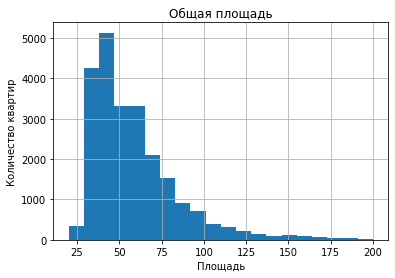

In [13]:
ax = data['total_area'].plot(x ='Площадь', y='Количество', kind='hist', bins=20, range=(20,200), title='Общая площадь', grid=True)
ax.set_xlabel('Площадь')
ax.set_ylabel('Количество квартир')

Больше всего квартир имеют площадь от 45 до 50 квадратных метров. На втором месте по количеству идут квартиры от 30 до 45 квадратных метров. И на третьем месте квартиры в районе от 50 до 60 квадратных метров.

Text(0, 0.5, 'Количество квартир')

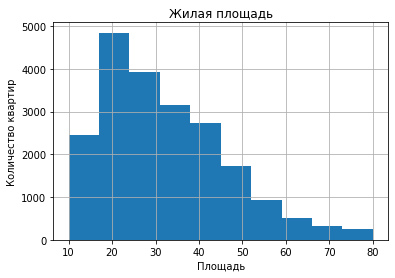

In [14]:
ax = data['living_area'].plot(kind='hist', bins=10, range=(10,80), title='Жилая площадь', grid=True)
ax.set_xlabel('Площадь')
ax.set_ylabel('Количество квартир')

Больше всего квартир имеют жилую площадь от 17 до 25 квадратных метров. На втором месте по количеству идут квартиры от 25 до 31 квадратных метров. И на третьем месте квартиры в районе от 31 до 38 квадратных метров.

Text(0, 0.5, 'Количество квартир')

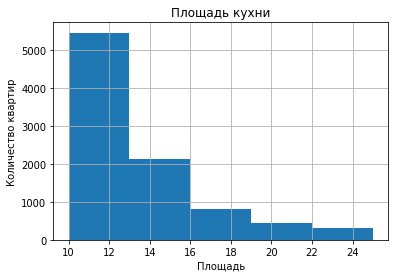

In [15]:
ax = data['kitchen_area'].plot(kind='hist', bins=5, range=(10,25), title='Площадь кухни', grid=True)
ax.set_xlabel('Площадь')
ax.set_ylabel('Количество квартир')

Больше всего квартир имеют кухонную площадь от 10 до 13 квадратных метров. На втором месте по количеству идут квартиры от 13 до 16 квадратных метров. И на третьем месте квартиры в районе от 16 до 19 квадратных метров.

Text(0, 0.5, 'Количество квартир')

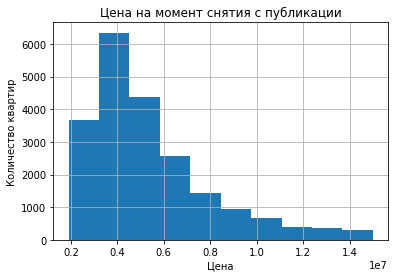

In [16]:
ax = data['last_price'].plot(kind='hist', bins=10, range=(1900000,15000000), title='Цена на момент снятия с публикации', grid=True)
ax.set_xlabel('Цена')
ax.set_ylabel('Количество квартир')

Больше всего квартир имеют цену от 3,5 до 4,5 миллионов рублей. На втором месте по количеству идут квартиры от 4,5 до 5,5 миллионов рублей. И на третьем месте квартиры в районе от 1,9 до 3,6 миллионов рублей.

Text(0, 0.5, 'Количество квартир')

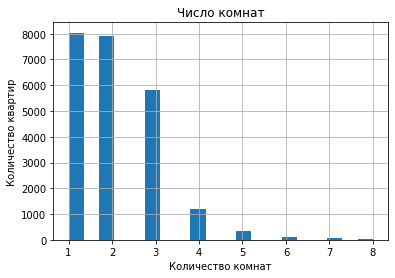

In [17]:
ax = data['rooms'].plot(kind='hist', bins=20, range=(1,8), title='Число комнат', grid=True)
ax.set_xlabel('Количество комнат')
ax.set_ylabel('Количество квартир')

Больше всего квартир имеют одну комнату. Немного меньше квартир с двумя комнатами. И на третьем месте трёхкомнатные квартиры.

Text(0, 0.5, 'Количество квартир')

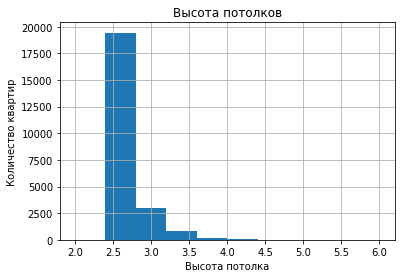

In [18]:
ax = data['ceiling_height'].plot(kind='hist', bins=10, range=(2,6), title='Высота потолков', grid=True)
ax.set_xlabel('Высота потолка')
ax.set_ylabel('Количество квартир')

Больше всего квартир имеют потолок от 2 до 2,7 метров. На втором месте по количеству идут квартиры с потолками от 2,7 до 3,6 метров.

Text(0, 0.5, 'Количество квартир')

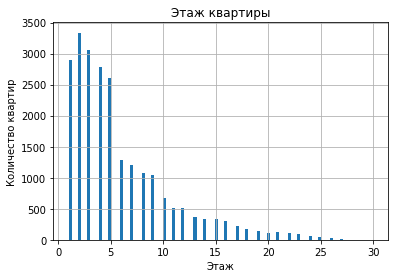

In [19]:
ax = data['floor'].plot(kind='hist', bins=100, range=(1,30), title='Этаж квартиры', grid=True)
ax.set_xlabel('Этаж')
ax.set_ylabel('Количество квартир')

Больше всего квартир располагаются на втором этаже. Немного меньше квартир расположенных на 3 этаже. После этого идут квартиры расположенные на 1 этаже.

Text(0, 0.5, 'Количество квартир')

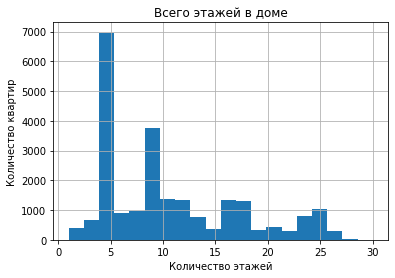

In [20]:
ax = data['floors_total'].plot(kind='hist', bins=20, range=(1,30), title='Всего этажей в доме', grid=True)
ax.set_xlabel('Количество этажей')
ax.set_ylabel('Количество квартир')

Больше всего квартир располагаются в домах с 4 и 5 этажам. После идут квартиры, которые располагаются в домах с 8 и 9 этажам.

Text(0, 0.5, 'Количество квартир')

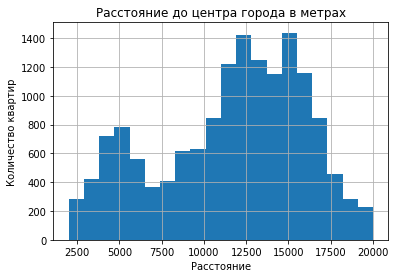

In [21]:
ax = data['cityCenters_nearest'].plot(kind='hist', bins=20, range=(2000,20000), title='Расстояние до центра города в метрах', grid=True)
ax.set_xlabel('Расстояние')
ax.set_ylabel('Количество квартир')

Больше всего квартир расположенны в районе 15000 метров от центра города. Чуть меньше квартир, которые расположенны в районе 12000 метров от центра города.

Text(0, 0.5, 'Количество квартир')

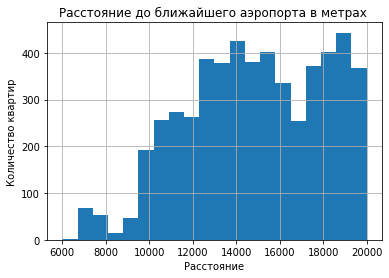

In [22]:
ax = data['airports_nearest'].plot(kind='hist', bins=20, range=(6000,20000), title='Расстояние до ближайшего аэропорта в метрах ', grid=True)
ax.set_xlabel('Расстояние')
ax.set_ylabel('Количество квартир')

Больше всего квартир расположенны в районе 19000 метров от ближайшего аэропорта. Чуть меньше квартир, которые расположенны в районе 14000 метров от ближайшего аэропорта.

Text(0, 0.5, 'Количество квартир')

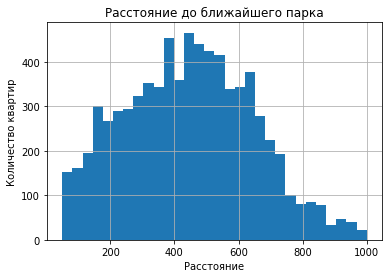

In [23]:
ax = data['parks_nearest'].plot(kind='hist', bins=30, range=(50,1000), title='Расстояние до ближайшего парка', grid=True)
ax.set_xlabel('Расстояние')
ax.set_ylabel('Количество квартир')

Большая часть квартир расположена в районе от 450 до 500 метров для ближайшего парка.

Text(0, 0.5, 'Количество квартир')

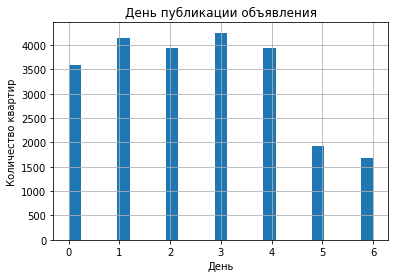

In [24]:
ax = data['day'].plot(kind='hist', bins=25, range=(0,6), title='День публикации объявления', grid=True)
ax.set_xlabel('День')
ax.set_ylabel('Количество квартир')

Большая часть квартир продается по будним дням лучше.

Text(0, 0.5, 'Количество квартир')

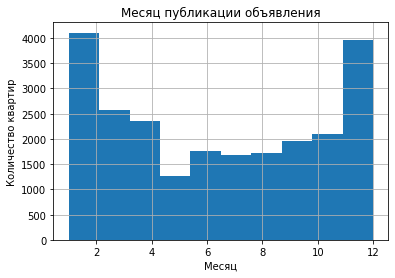

In [25]:
ax = data['month'].plot(kind='hist', bins=10, range=(1,12), title='Месяц публикации объявления', grid=True)
ax.set_xlabel('Месяц')
ax.set_ylabel('Количество квартир')

В первый и последний месяц квартиры продаются лучше всего.

Text(0, 0.5, 'Количество квартир')

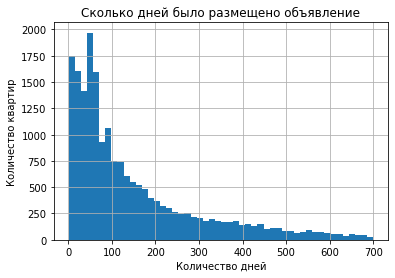

In [26]:
ax = data['days_exposition'].plot(kind='hist', bins=50, range=(1,700), title='Сколько дней было размещено объявление', grid=True)
ax.set_xlabel('Количество дней')
ax.set_ylabel('Количество квартир')

In [27]:
data['days_exposition'].mean(), data['days_exposition'].median()

(181.55489906450023, 96.0)

Чем дольше квартиру не покупают, тем меньше вероятность дальнейшей покупки. Быстрыми продажи считаются если квартира продается в течении ста дней. Необычайно долгие продажи для квартир, это квартиры, которые продаются после 300 дней, то есть если квартира не продается практически целый год.

<AxesSubplot:xlabel='total_area'>

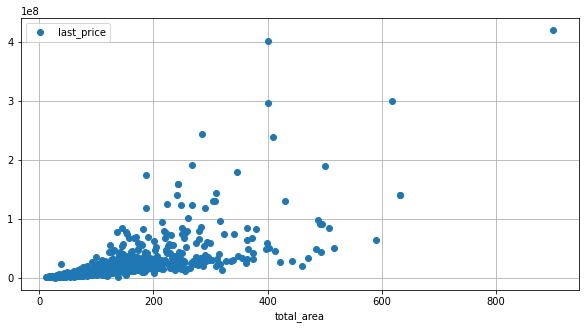

In [28]:
(
    data.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(10, 5))
)

In [29]:
data['total_area'].corr(data['last_price'])

0.6532077512044184

<AxesSubplot:xlabel='living_area'>

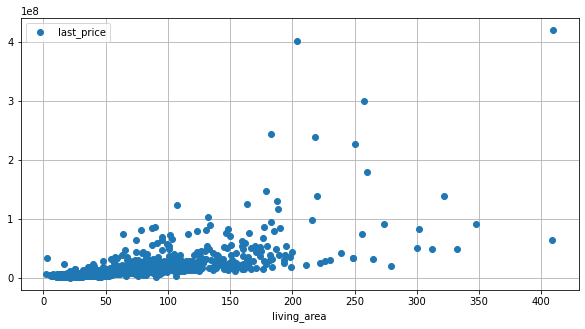

In [30]:
(
    data.pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o', figsize=(10, 5))
)

In [31]:
data['living_area'].corr(data['last_price'])

0.5661672351517757

<AxesSubplot:xlabel='kitchen_area'>

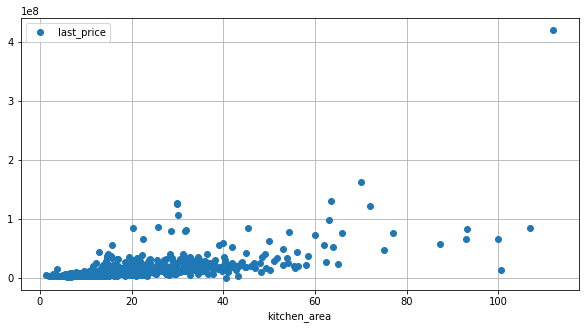

In [32]:
(
    data.pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='o', figsize=(10, 5))
)

In [33]:
data['kitchen_area'].corr(data['last_price'])

0.5198330487977115

<AxesSubplot:xlabel='rooms'>

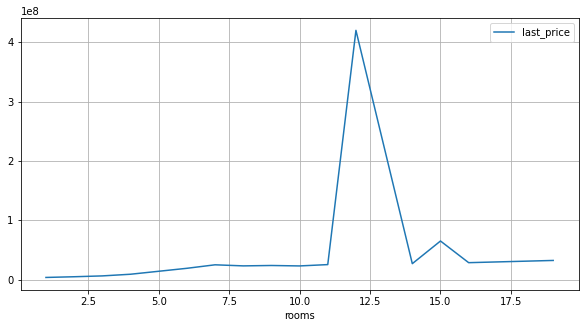

In [34]:
(
    data.pivot_table(index='rooms', values='last_price', aggfunc='median')
    .plot(grid=True, style='-', figsize=(10, 5))
)


In [35]:
data['rooms'].corr(data['last_price'])

0.36487861170752905

In [36]:
data.pivot_table(index='floor_type', values='last_price')

,last_price
floor_type,
другой,6.709748e+06
первый,4.818715e+06
последний,7.376120e+06


<AxesSubplot:xlabel='day'>

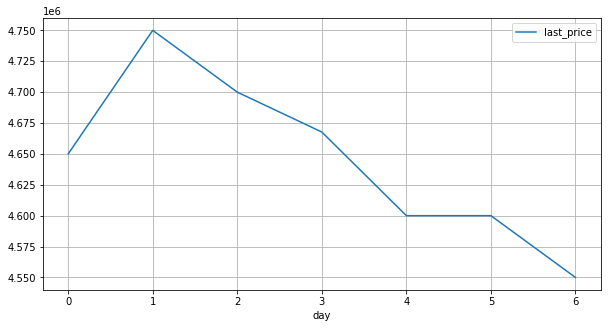

In [37]:
(
    data.pivot_table(index='day', values='last_price', aggfunc='median')
    .plot(grid=True, style='-', figsize=(10, 5))
)


<AxesSubplot:xlabel='month'>

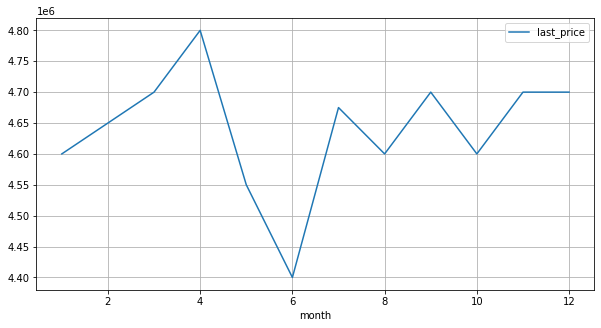

In [38]:
(
    data.pivot_table(index='month', values='last_price', aggfunc='median')
    .plot(grid=True, style='-', figsize=(10, 5))
)

<AxesSubplot:xlabel='year'>

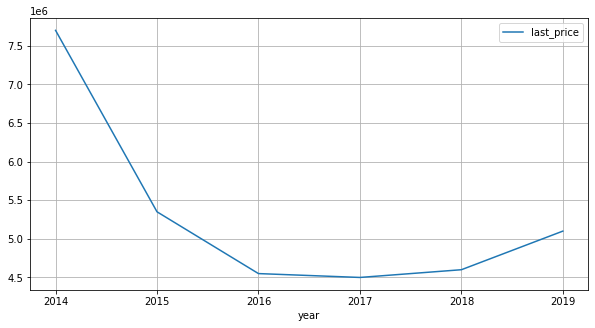

In [39]:
(
    data.pivot_table(index='year', values='last_price', aggfunc='median')
    .plot(grid=True, style='-', figsize=(10, 5))
)

На графиках зависимости цены от площади коэффициент корреляции Пирсона — положительный. Особенно положительный у зависимости общей площади от цены. У зависимости количества комнат от цены также есть небольшой положительный коэффициент. Следовательно можно говорить об определенной связи между величинами особенно между общей площадью и ценой.
Цены за квартиры от 11 до 13 комнат аномально высокие, ведь квартиры с большим количеством комнат стоят гораздо дешевле. Самые дорогие квартиры покупаются в первые дни недели. Цена падает от 4 до 6 месяца и начинает возратать с 6 месяца. с 2014 до 2017 года цена падала, но с 2018 начала расти.

In [40]:
top_10_localitions = data['locality_name'].value_counts().head(10)
locality_price = data.pivot_table(index='locality_name', values='price_per_m2')
top_10 = locality_price.merge(top_10_localitions,  how='right', left_index=True, right_index=True)
top_10.sort_values(by='locality_name', ascending=False)

,price_per_m2,locality_name
Санкт-Петербург,114769.940736,15592
поселок Мурино,85040.964659,528
поселок Шушары,78405.738532,436
Всеволожск,68618.013724,392
Пушкин,103125.819377,369
Колпино,75424.579112,338
поселок Парголово,90289.778019,323
Гатчина,68757.678399,306
деревня Кудрово,92297.218834,283
Выборг,58141.909325,237


In [41]:
( data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='cityCenters_nearest_km', values='last_price',aggfunc='mean')
)

,last_price
cityCenters_nearest_km,
0.0,3.144912e+07
1.0,2.127482e+07
2.0,1.788662e+07
3.0,1.115863e+07
4.0,1.332532e+07
5.0,1.453061e+07
6.0,1.532842e+07
7.0,1.483023e+07
8.0,1.003016e+07


### Общий вывод

Исследование проходило для сервиса Яндекс.Недвижимость. В ходе исследования нужно было установить параметры, которые позволят построить автоматизированную систему. Входные данные от сервиса Яндекс.Недвижимость - это архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. В исходных данных были найдены дубликаты, пропуски и артефакты, которые были успешно обработаны для нашего исследования, большая часть пропусков была оставлена из-за не возможности их заполнения. Входе исследования были изучены все параметры на наличие выдающихся значений, были определены аномалии. Также были посчитаны и добавлины в таблицу: цена квадратного метра за квартиру, дни недели, месяцы и года, категории по этажам квартир.
Входе исследования были выявлены следующие закономерности:
1) Больше всего квартир имеют площадь от 45 до 50 квадратных метров. На втором месте по количеству идут квартиры от 30 до 45 квадратных метров. Квартиры имеющие площадь 100 и более квадратных метров появляются редко.
2) Больше всего квартир имеют цену от 3,5 до 4,5 миллионов рублей. На втором месте по количеству идут квартиры от 4,5 до 5,5 миллионов рублей. И на третьем месте квартиры в районе от 1,9 до 3,6 миллионов рублей.
3) Квартиры имеющие 1 и 2 комнаты самые распространённые. значительно меньше трёхкомнатных квартир. Квартиры с 4 комнатнами и более крайне малочислены.
4) Больше всего квартир имеют потолок от 2 до 2,7 метров.
5) Квартиры представленные в данных обычно располагаются от 1 до 5.
6) Больше всего квартир расположенны в районе 15000 метров от центра города.
7) Большинство людей покупают квартиры в будние дни.
8) Чем дольше квартиру не покупают, тем меньше вероятность дальнейшей покупки.
9) В первый и последний месяц квартиры продаются лучше всего.
10) В Санкт-Петербурге расположенно больше квартир на продажу чем в остальных населенных пунктах вместе взятых, но при этом и цена значительно выше.